# Embedding

## Why Embedding?
As we know, machines can't handle text, it can only handle numbers. But how to convert a word to numbers?

The most naive approach would be to take a list of all the words in your text and attribute a number to all of them. It will work but you can imagine that some problems will appear:
* How do you handle unknown words? 
* If your text contains `doctor`, `nurse`, and `candy`. `doctor` and `nurse` have a strong similarity but `candy` doesn't. How can we make the machine understand that? With our naive technique, `doctor` could have the number `5` associated to it and nurse the number `98767`.

Of course, a lot of people already spent some time with those problems. the solution that came out of it is "Embedding". 

## What is embeddings?

An embedding is a **VECTOR** which represents a word or a document.

A vector will be attributed to each token. Each vector will contain multiple dimensions (usually tens or hundreds of dimensions).

```
[...] associate with each word in the vocabulary a distributed word feature vector [...] The feature vector represents different aspects of the word: each word is associated with a point in a vector space. The number of features [...] is much smaller than the size of the vocabulary.
```
- [A Neural Probabilistic Language Model](https://www.jmlr.org/papers/volume3/bengio03a/bengio03a.pdf), 2003.

Long story short, embeddings convert words into vectors in a way that allows the machine to understand the similarity betweens them.

Each embedding library has it's own way of classifying words, it will regroup words into big categories. Each word will get a score for each category.

To take a simple example the word `mother` could be classified like that:

|        | female | family | human | animal|
|--------|--------|---------|-------|-------|
| mother | 0.9    | 0.9.    | 0.7   | 0.1   |

**Explanations:** Mother has a strong similarity with female, family and human but it has a low similarity with animal.

**Disclaimer:** Those numbers and categories are totally arbitrary and are only here to show an example.

Here is another example with more complete datas:

![embedding](https://miro.medium.com/max/2598/1*sAJdxEsDjsPMioHyzlN3_A.png)

## Should I do it by hand?

You could, but if some people already did the job for you and spent a lot of time to optimize it, why not use it?

## What to use?

There are a lot of libraries out there for embeddings. Which one is the best? Once again, *it depends*. The results will change depending on the text you are using, the information you want to extract, the model you use,...

Choosing the "best" embedding model will be part of the hyper-optimization that you can do at the end of a project.

If you want understand embeddings more in depth, [follow this link](http://jalammar.github.io/illustrated-word2vec/)

Here are some of the best libraries of the moment:

* [Flair](https://github.com/flairNLP/flair) (University of Berlin)
* [fasttext](https://fasttext.cc/) (Facebook)
* [GloVe](https://github.com/stanfordnlp/GloVe) (Stanford)

And the oldest way doing it (but still good):
* [Word2Vec](https://www.tensorflow.org/tutorials/text/word2vec)

## Practice time!

Enough reading, let's practice a bit. Can you use SpaCy to embed this sentence?
Read the [spacy embedding documentation](https://spacy.io/usage/vectors-similarity)

In [9]:
# sentence = "I love learning"
# Embed `sentence` with SpaCy

import spacy

# Load the SpaCy model
nlp = spacy.load("en_core_web_sm")

# Input sentence
sentence = "I love learning"

# Process the sentence with SpaCy to obtain a Doc object
doc = nlp(sentence)


What is the shape of each word's vector?

In [10]:
# Access the word vectors for each token in the Doc
word_vectors = [token.vector for token in doc]

# Display the shape of each word's vector
for i, token in enumerate(doc):
    print(f"Token {i + 1} - {token.text}: {token.vector.shape}")

Token 1 - I: (96,)
Token 2 - love: (96,)
Token 3 - learning: (96,)


Try with Flair and Glove now (You will find how to do [here](https://github.com/flairNLP/flair/blob/master/resources/docs/TUTORIAL_3_WORD_EMBEDDING.md))
- FlairEmbeddings('news-forward') and FlairEmbeddings('news-backward') 
- load pre-trained forward and backward Flair embeddings.
- Sentence(sentence) creates a Flair Sentence object for the input sentence.
- flair_embedding_forward.embed(flair_sentence) and flair_embedding_backward.embed(flair_sentence) embed the sentence with Flair.

In [19]:
from flair.data import Sentence
from flair.embeddings import FlairEmbeddings

# Load Flair embeddings
flair_embedding_forward = FlairEmbeddings('news-forward')
flair_embedding_backward = FlairEmbeddings('news-backward')

# Input sentence
sentence = "I love learning"

# Create a Flair Sentence object
flair_sentence = Sentence(sentence)

# Embed sentence with Flair (using stacked embeddings)
flair_embedding_forward.embed(flair_sentence)
flair_embedding_backward.embed(flair_sentence)

# Display the shape of each word's vector for Flair
for token in flair_sentence:
    print(f"Flair - {token.text}: {token.embedding.shape}")


Flair - I: torch.Size([4096])
Flair - love: torch.Size([4096])
Flair - learning: torch.Size([4096])


- Load the SpaCy model with GloVe embeddings.
    - use of "en_core_web_md" instead of "en_core_web_sm" to load the medium-sized GloVe model.
- Process the sentence using the SpaCy model to obtain a Doc object.
- Access the word vectors for each token in the Doc.

In [13]:
# Embed with Glove
# python -m spacy download en_core_web_md

import spacy

# Load the SpaCy model with GloVe embeddings
nlp = spacy.load("en_core_web_md")  # Use "en_core_web_md" for GloVe embeddings

# Input sentence
sentence = "I love learning"

# Process the sentence with SpaCy to obtain a Doc object
doc = nlp(sentence)

# Access the word vectors for each token in the Doc
word_vectors = [token.vector for token in doc]

# Display the shape of each word's vector
for i, token in enumerate(doc):
    print(f"Token {i + 1} - {token.text}: {token.vector.shape}")


Token 1 - I: (300,)
Token 2 - love: (300,)
Token 3 - learning: (300,)


What is the shape of each word's vector?

In [20]:
# Display the shape of each word's vector
for i, token in enumerate(doc):
    print(f"Token {i + 1} - {token.text}: {token.vector.shape}")

Token 1 - I: (300,)
Token 2 - love: (300,)
Token 3 - learning: (300,)


### Put all together

In [21]:
from flair.embeddings import WordEmbeddings, FlairEmbeddings, StackedEmbeddings
from flair.data import Sentence  # Import Sentence class
import numpy as np
import spacy

# Load Flair embeddings
flair_embedding_forward = FlairEmbeddings('news-forward')
flair_embedding_backward = FlairEmbeddings('news-backward')

# Combine Flair embeddings (forward and backward)
stacked_embeddings = StackedEmbeddings(
    embeddings=[flair_embedding_forward, flair_embedding_backward]
)

# Load GloVe embeddings (for comparison)
glove_embedding = WordEmbeddings('glove')

# Input sentence
sentence = "I love learning"

# Create a Flair Sentence object
flair_sentence = Sentence(sentence)

# Embed sentence with Flair (using stacked embeddings)
stacked_embeddings.embed(flair_sentence)

# Embed sentence with GloVe
glove_embedding.embed(flair_sentence)

# Display the shape of each word's vector for Flair and GloVe
for token in flair_sentence:
    print(f"Flair - {token.text}: {token.embedding.shape}")

# GloVe tokens can be accessed similarly
for token in flair_sentence:
    print(f"GloVe - {token.text}: {token.embedding.shape}")


Flair - I: torch.Size([4196])
Flair - love: torch.Size([4196])
Flair - learning: torch.Size([4196])
GloVe - I: torch.Size([4196])
GloVe - love: torch.Size([4196])
GloVe - learning: torch.Size([4196])


Your text is now embedded, your model will be able to understand it, yeah!

## Maths on text

Since the words are embedded into vectors we can now apply mathematical methods on them.

### Average vector

For example we could build the average vector for a text by using NumPy! This is a straightforward way to build one single representation for a text.

In [3]:
text = "I want to be a famous data scientist"

# Apply a spacy model on the text

# Get all word vectors into a list

# Compute and display the average vector of the text

In [22]:
import spacy
import numpy as np

# Input text
text = "I want to be a famous data scientist"

# Apply a spaCy model on the text
nlp = spacy.load("en_core_web_sm")
doc = nlp(text)

# Get all word vectors into a list
word_vectors = [token.vector for token in doc]

# Compute the average vector of the text using NumPy
average_vector = np.mean(word_vectors, axis=0)

# Display the average vector
print(f"Average Vector for '{text}':\n{average_vector}")


Average Vector for 'I want to be a famous data scientist':
[-0.3654937  -0.38459802 -0.03600696  0.1665831  -0.2604949  -0.20714197
  0.5528618   0.04135784  0.0504141   0.49082607 -0.3910929  -0.06535681
 -0.17045459  0.4250961  -0.5463355   0.1105784   0.30260336 -0.44005656
 -0.2059417   0.0240252  -0.16197489 -0.13523968 -0.7980706  -0.09066293
  0.38363916 -0.5328323   0.2094995   0.60676956  0.3989598   0.25029638
  0.16502959  0.12283247  0.54348916 -0.42070842 -0.09966052 -0.14620785
  0.02098531  0.00686303 -0.01750061 -0.10513993 -0.17255153  0.51213837
 -0.00557378  0.28086853  0.16137688  0.03765985  0.3014943   0.63864344
  0.06741595  0.21431287 -0.6729937   0.548541    0.01149153 -0.4430378
  0.05876388 -0.01845983 -0.27450767  0.8814877  -0.53976923 -0.19735704
  0.31136662  0.0170902  -0.16493943 -0.47753382  0.14582148 -0.26741064
  0.16711408 -0.08580039  0.05300102  0.02736029  0.09043667  0.1674525
  0.11383164  0.23527867 -0.17614998 -0.3664943  -0.16671818 -0.057

### Word similarity

We can also compute the similarity between two words by using distance measures (e.g. [cosine distance](https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.cosine.html), [euclidean distance](https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.euclidean.html)...). These measures will calculate the distance between word embeddings in the vector space.

#### Let's practice!

In [ ]:
# Import the required libraries

word1 = "computer"
word2 = "keyboard"

# Get the vector for both words through your favorite model: 
# cosine distance or euclidean  distance (calculate distance between word embeddings in the vector space)

# Compute the cosine and the euclidean distance between both words

# Try with other pairs of words for comparing the results

In [24]:
import spacy
from sklearn.metrics.pairwise import cosine_similarity
from scipy.spatial.distance import euclidean

# Load the SpaCy model with word vectors (e.g., "en_core_web_md" for medium-sized model)
nlp = spacy.load("en_core_web_md")

# Input words
word1 = "computer"
word2 = "keyboard"

# Get the vectors for both words
vec_word1 = nlp(word1).vector
vec_word2 = nlp(word2).vector

# Compute cosine similarity
cosine_sim = cosine_similarity([vec_word1], [vec_word2])[0][0]

# Compute Euclidean distance
euclidean_dist = euclidean(vec_word1, vec_word2)

# Display the similarity measures
print(f"Cosine Similarity between '{word1}' and '{word2}': {cosine_sim}")
print(f"Euclidean Distance between '{word1}' and '{word2}': {euclidean_dist}")


Cosine Similarity between 'computer' and 'keyboard': 0.5312139391899109
Euclidean Distance between 'computer' and 'keyboard': 39.738563537597656


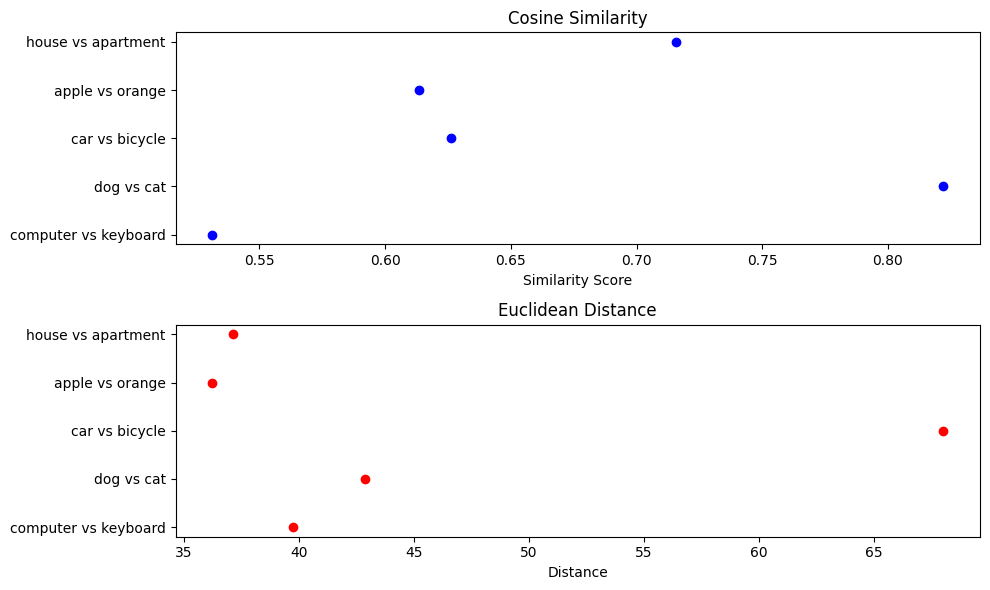

In [26]:
import spacy
from sklearn.metrics.pairwise import cosine_similarity
from scipy.spatial.distance import euclidean
import matplotlib.pyplot as plt

# Load the SpaCy model with word vectors (e.g., "en_core_web_md" for medium-sized model)
nlp = spacy.load("en_core_web_md")

# Word pairs
pairs = [
    ("computer", "keyboard"),
    ("dog", "cat"),
    ("car", "bicycle"),
    ("apple", "orange"),
    ("house", "apartment")
]

# Lists to store similarity measures
cosine_sims = []
euclidean_dists = []

# Compute similarity for each pair
for word1, word2 in pairs:
    vec_word1 = nlp(word1).vector
    vec_word2 = nlp(word2).vector

    cosine_sim = cosine_similarity([vec_word1], [vec_word2])[0][0]
    euclidean_dist = euclidean(vec_word1, vec_word2)

    cosine_sims.append(cosine_sim)
    euclidean_dists.append(euclidean_dist)

# Visualize results
plt.figure(figsize=(10, 6))

# Cosine Similarity Scatter Plot
plt.subplot(2, 1, 1)
plt.scatter(cosine_sims, range(len(pairs)), color='blue')
plt.title('Cosine Similarity')
plt.xlabel('Similarity Score')
plt.yticks(range(len(pairs)), [f"{pair[0]} vs {pair[1]}" for pair in pairs])

# Euclidean Distance Scatter Plot
plt.subplot(2, 1, 2)
plt.scatter(euclidean_dists, range(len(pairs)), color='red')
plt.title('Euclidean Distance')
plt.xlabel('Distance')
plt.yticks(range(len(pairs)), [f"{pair[0]} vs {pair[1]}" for pair in pairs])

plt.tight_layout()
plt.show()


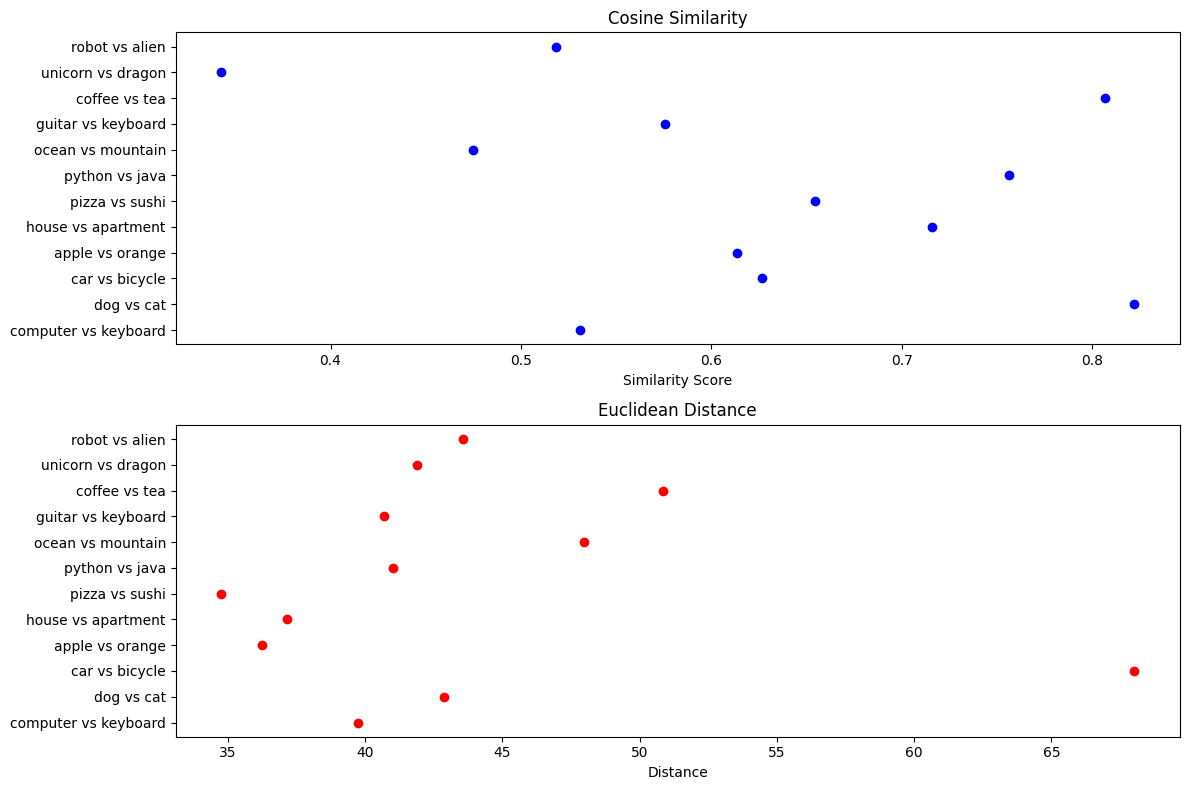

In [27]:
import spacy
from sklearn.metrics.pairwise import cosine_similarity
from scipy.spatial.distance import euclidean
import matplotlib.pyplot as plt

# Load the SpaCy model with word vectors (e.g., "en_core_web_md" for medium-sized model)
nlp = spacy.load("en_core_web_md")

# Word pairs
pairs = [
    ("computer", "keyboard"),
    ("dog", "cat"),
    ("car", "bicycle"),
    ("apple", "orange"),
    ("house", "apartment"),
    ("pizza", "sushi"),
    ("python", "java"),
    ("ocean", "mountain"),
    ("guitar", "keyboard"),
    ("coffee", "tea"),
    ("unicorn", "dragon"),
    ("robot", "alien"),
]

# Lists to store similarity measures
cosine_sims = []
euclidean_dists = []

# Compute similarity for each pair
for word1, word2 in pairs:
    vec_word1 = nlp(word1).vector
    vec_word2 = nlp(word2).vector

    cosine_sim = cosine_similarity([vec_word1], [vec_word2])[0][0]
    euclidean_dist = euclidean(vec_word1, vec_word2)

    cosine_sims.append(cosine_sim)
    euclidean_dists.append(euclidean_dist)

# Visualize results
plt.figure(figsize=(12, 8))

# Cosine Similarity Scatter Plot
plt.subplot(2, 1, 1)
plt.scatter(cosine_sims, range(len(pairs)), color='blue')
plt.title('Cosine Similarity')
plt.xlabel('Similarity Score')
plt.yticks(range(len(pairs)), [f"{pair[0]} vs {pair[1]}" for pair in pairs])

# Euclidean Distance Scatter Plot
plt.subplot(2, 1, 2)
plt.scatter(euclidean_dists, range(len(pairs)), color='red')
plt.title('Euclidean Distance')
plt.xlabel('Distance')
plt.yticks(range(len(pairs)), [f"{pair[0]} vs {pair[1]}" for pair in pairs])

plt.tight_layout()
plt.show()


## Stack embeddings

The previous embeddings are good, but if you want something even better, you can "stack" these embeddings to create a bigger vector. It gives better results but will also require more computation power.

[Here is a super clear and understandable guide](https://github.com/flairNLP/flair/blob/master/resources/docs/TUTORIAL_3_WORD_EMBEDDING.md) to get it done. (by the Flair's team)


1. Load Embeddings:

- Load Flair embeddings for both forward and backward directions.
- Combine Flair embeddings using StackedEmbeddings.
- Load GloVe Embeddings:

2. Load GloVe embeddings using WordEmbeddings.
- Input Sentence:

3. Define the input sentence: "I love learning".
- Create Flair Sentence Object:

4. Create a Flair Sentence object for the input sentence.
- Embed Sentence with Flair (Stacked Embeddings):

5. Embed the sentence using stacked embeddings with Flair.
- Embed Sentence with GloVe:

6. Embed the sentence using GloVe embeddings for comparison.
- Display Word Vector Shapes:

7. Print the shapes of word vectors for each token in both Flair and GloVe embeddings.

In [29]:
from flair.embeddings import WordEmbeddings, FlairEmbeddings, StackedEmbeddings
from flair.data import Sentence  # Import Sentence class

# Load Flair embeddings
flair_embedding_forward = FlairEmbeddings('news-forward')
flair_embedding_backward = FlairEmbeddings('news-backward')

# Combine Flair embeddings (forward and backward)
stacked_embeddings = StackedEmbeddings(
    embeddings=[flair_embedding_forward, flair_embedding_backward]
)

# Load GloVe embeddings (for comparison)
glove_embedding = WordEmbeddings('glove')

# Input sentence
sentence = "I love learning"

# Create a Flair Sentence object
flair_sentence = Sentence(sentence)

# Embed sentence with Flair (using stacked embeddings)
stacked_embeddings.embed(flair_sentence)

# Embed sentence with GloVe
glove_embedding.embed(flair_sentence)

# Display the shape of each word's vector for Flair and GloVe
for token in flair_sentence:
    print(f"Flair - {token.text}: {token.embedding.shape}")

# GloVe tokens can be accessed similarly
for token in flair_sentence:
    print(f"GloVe - {token.text}: {token.embedding.shape}")


Flair - I: torch.Size([4196])
Flair - love: torch.Size([4196])
Flair - learning: torch.Size([4196])
GloVe - I: torch.Size([4196])
GloVe - love: torch.Size([4196])
GloVe - learning: torch.Size([4196])


## More resources
* [Why do we use word embeddings in NLP?](https://towardsdatascience.com/why-do-we-use-embeddings-in-nlp-2f20e1b632d2)
* [More details on what word embeddings are exactly?](https://www.analyticsvidhya.com/blog/2017/06/word-embeddings-count-word2veec/)